In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [18]:
df = pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [19]:
df['State'].value_counts()

State
New York      17
California    17
Florida       16
Name: count, dtype: int64

In [20]:
from sklearn.preprocessing import OneHotEncoder
cat_cols  = ['State']
ohe = OneHotEncoder(drop='first')
X_encoded = ohe.fit_transform(df[cat_cols]).toarray()
X_encoded_df = pd.DataFrame(X_encoded, columns=ohe.get_feature_names_out(cat_cols))
X_encoded_df

,State_Florida,State_New York
0,0.0,1.0
1,0.0,0.0
2,1.0,0.0
3,0.0,1.0
4,1.0,0.0
5,0.0,1.0
6,0.0,0.0
7,1.0,0.0
8,0.0,1.0
9,0.0,0.0


<Axes: xlabel='R&D Spend', ylabel='Profit'>

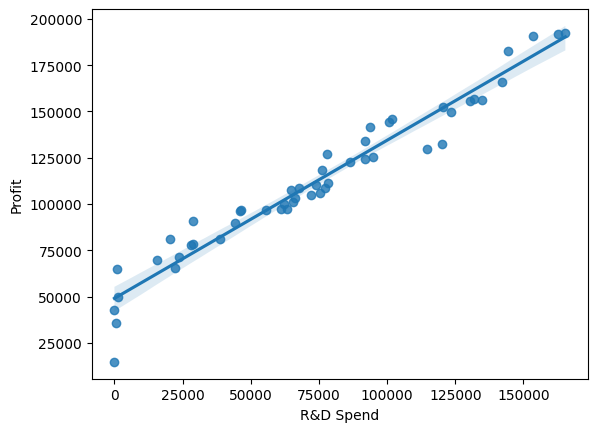

In [21]:
sns.regplot(x='R&D Spend', y = 'Profit', data=df)

<Axes: xlabel='Administration', ylabel='Profit'>

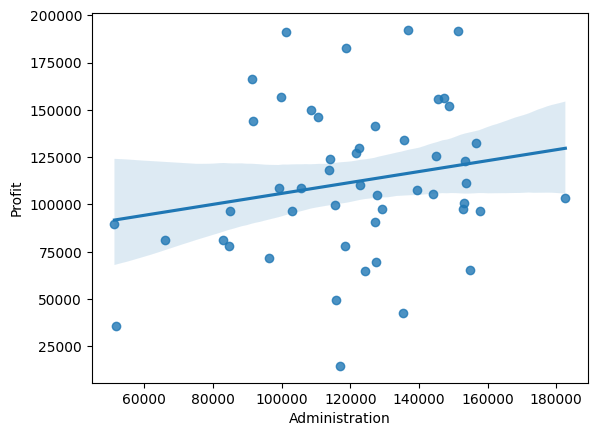

In [22]:
sns.regplot(x='Administration', y = 'Profit', data=df)

<Axes: xlabel='Marketing Spend', ylabel='Profit'>

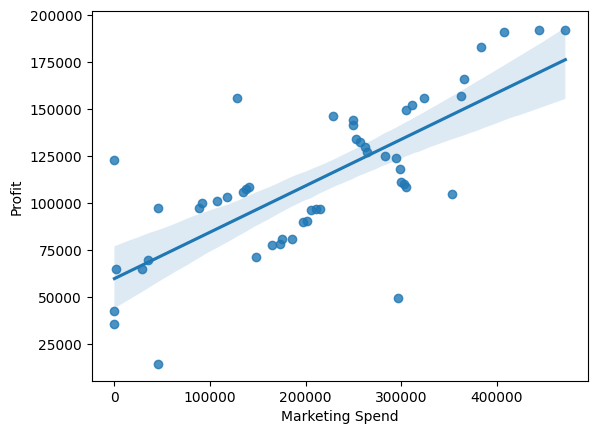

In [23]:
sns.regplot(x='Marketing Spend', y = 'Profit', data=df)

# Model Training

In [ ]:
cat_cols = ['State']
ohe = OneHotEncoder(drop='first')
X_encoded = ohe.fit_transform(df[cat_cols]).toarray()
X_encoded_df = pd.DataFrame(X_encoded, columns= ohe.get_feature_names_out(cat_cols))
X_encoded_df.head()

,State_Florida,State_New York
0,0.0,1.0
1,0.0,0.0
2,1.0,0.0
3,0.0,1.0
4,1.0,0.0


In [27]:
clean_df = pd.concat([df, X_encoded_df], axis=1).drop(cat_cols, axis = 1)
clean_df

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0.0,1.0
1,162597.70,151377.59,443898.53,191792.06,0.0,0.0
2,153441.51,101145.55,407934.54,191050.39,1.0,0.0
3,144372.41,118671.85,383199.62,182901.99,0.0,1.0
4,142107.34,91391.77,366168.42,166187.94,1.0,0.0
5,131876.90,99814.71,362861.36,156991.12,0.0,1.0
6,134615.46,147198.87,127716.82,156122.51,0.0,0.0
7,130298.13,145530.06,323876.68,155752.60,1.0,0.0
8,120542.52,148718.95,311613.29,152211.77,0.0,1.0
9,123334.88,108679.17,304981.62,149759.96,0.0,0.0


In [28]:
from sklearn.preprocessing import StandardScaler
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
clean_df[num_cols] = scaler.fit_transform(clean_df[num_cols])
clean_df

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,2.016411,0.560753,2.153943,2.011203,0.0,1.0
1,1.955860,1.082807,1.923600,1.999430,0.0,0.0
2,1.754364,-0.728257,1.626528,1.980842,1.0,0.0
3,1.554784,-0.096365,1.422210,1.776627,0.0,1.0
4,1.504937,-1.079919,1.281528,1.357740,1.0,0.0
5,1.279800,-0.776239,1.254210,1.127250,0.0,1.0
6,1.340066,0.932147,-0.688150,1.105481,0.0,0.0
7,1.245057,0.871980,0.932186,1.096210,1.0,0.0
8,1.030369,0.986952,0.830887,1.007470,0.0,1.0
9,1.091819,-0.456640,0.776107,0.946022,0.0,0.0


In [31]:
x= clean_df.drop('Profit', axis = 1)
y = clean_df['Profit']

In [32]:
X_train, X_test, y_train , y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [33]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [34]:
y_pred = regressor.predict(X_test)

In [35]:
print(regressor.predict([[12]]))

c:\Users\aakar\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: X has 1 features, but LinearRegression is expecting 5 features as input.

In [36]:
from joblib import dump, load
with open('models/multiple_linear_regression_model.joblib','wb') as f:
    dump(regressor, f) #dump the model to the file
    print("Model Dumped Successfully")

Model Dumped Successfully
